In [29]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

In [33]:
x = np.logspace(1,12,12,base=1.2)*0.001
nx = np.append(x,np.ones(47)*0.02)
nx = np.append(0.,nx)
nx = nx.cumsum()
nx = np.append(nx,1.)
nx *= 0.9
nx[40]

0.5467469424205826

### 根据NACA翼型厚度获得宽度曲线

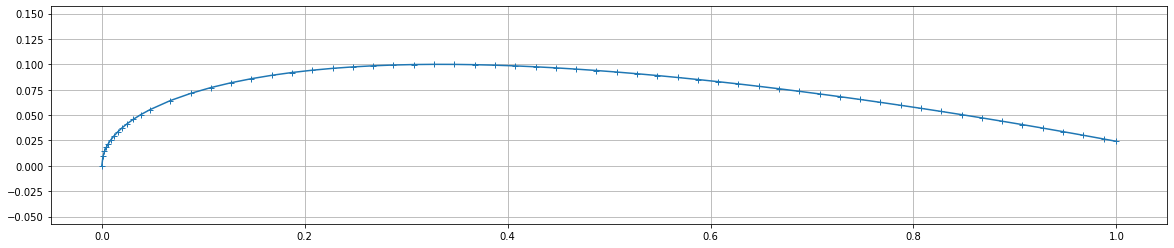

In [15]:
plt.figure(figsize=[20,4])
x,y=naca4(nx,20)
plt.plot(x/0.9,y,"+-")
plt.grid()
plt.axis("equal")
bb=y

### 根据翼型获得高度曲线

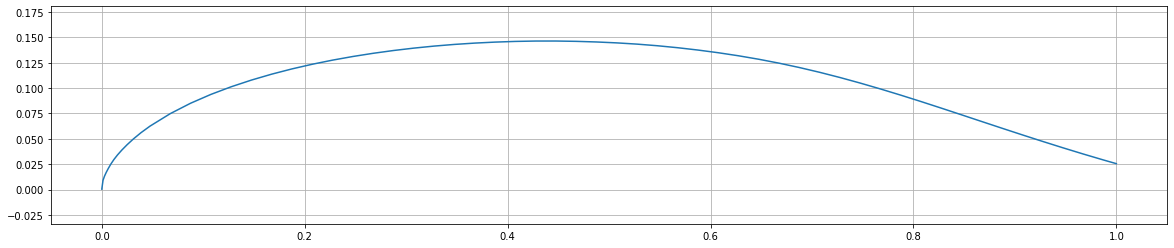

In [16]:
plt.figure(figsize=[20,4])
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
plt.plot(x/0.9,y)
plt.axis("equal")
plt.grid()
aa=y


In [17]:

## 根据B样条曲线确定nn参数  两组参数

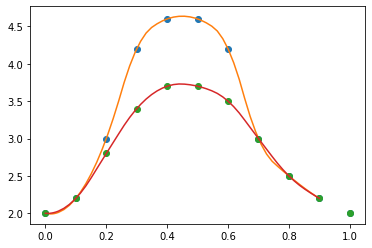

In [18]:
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x,y1,"o",nx,ny1)
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
plt.plot(x,y2,"o",nx,ny2)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

In [19]:
nx

array([0.        , 0.00108   , 0.002376  , 0.0039312 , 0.00579744,
       0.00803693, 0.01072431, 0.01394918, 0.01781901, 0.02246281,
       0.02803538, 0.03472245, 0.04274694, 0.06074694, 0.07874694,
       0.09674694, 0.11474694, 0.13274694, 0.15074694, 0.16874694,
       0.18674694, 0.20474694, 0.22274694, 0.24074694, 0.25874694,
       0.27674694, 0.29474694, 0.31274694, 0.33074694, 0.34874694,
       0.36674694, 0.38474694, 0.40274694, 0.42074694, 0.43874694,
       0.45674694, 0.47474694, 0.49274694, 0.51074694, 0.52874694,
       0.54674694, 0.56474694, 0.58274694, 0.60074694, 0.61874694,
       0.63674694, 0.65474694, 0.67274694, 0.69074694, 0.70874694,
       0.72674694, 0.74474694, 0.76274694, 0.78074694, 0.79874694,
       0.81674694, 0.83474694, 0.85274694, 0.87074694, 0.88874694,
       0.9       ])

In [28]:
x=np.array([])
y1=np.array([])

x = np.append(x,np.linspace(0,0.12,4))
x = np.append(x,np.linspace(0.16000013,0.24300055,3))
x = np.append(x,np.linspace( 0.30600051,0.4950004,4))
x = np.append(x,np.linspace(0.54000079,0.80000064,5))
x = np.append(x,np.linspace(0.80000114,0.90000072,3))
x

array([0.        , 0.04      , 0.08      , 0.12      , 0.16000013,
       0.20150034, 0.24300055, 0.30600051, 0.36900047, 0.43200044,
       0.4950004 , 0.54000079, 0.60500075, 0.67000072, 0.73500068,
       0.80000064, 0.80000114, 0.85000093, 0.90000072])

In [ ]:
x=np.array([])
y1=np.array([])
x = np.append(0.24300055, 0.36900047)
x = np.append(x,np.linspace(0.36900047 0.80000064,3))
x = np.append(x,np.linspace( 0.8,0.9,3))
x

In [21]:
y1 = np.append(y1,np.linspace(0.16, 0.116 ,4))
y1 = np.append(0.1 , 0.0875  )
y1 = np.append( 0.0875, 0.06125, 0.03500001)
y1 = np.append(y1,np.linspace(0.035,0.0349999,3))
y1

array([0.16      , 0.149     , 0.138     , 0.127     , 0.116     ,
       0.108     , 0.1       , 0.09375   , 0.0875    , 0.08125001,
       0.07500001, 0.07      , 0.06125   , 0.05250001, 0.04375001,
       0.03500001, 0.035     , 0.03499995, 0.0349999 ])

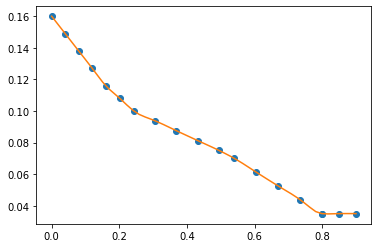

In [22]:
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)   # ny1就是插值得到的y值，也就是要求的delta
plt.plot(x,y1,"o",nx,ny1)

In [23]:
nx*=1.8

(-0.08100000000000002, 1.701, -0.2513103976136165, 0.08165435869191434)

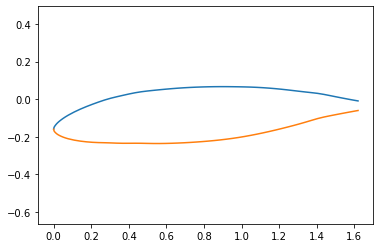

In [24]:
psi = np.linspace(0,2*pi,81)
zmax=[]
zmin=[]
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    z-=ny1[idx]
    zmax.append(z.max())
    zmin.append(z.min())
plt.plot(nx,zmax)
plt.plot(nx,zmin)
plt.axis("equal")

(-0.13202507053390158,
 0.13202507053390158,
 -0.2513103976136165,
 0.08165435869191434)

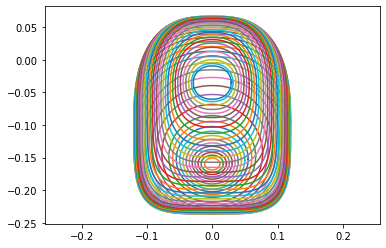

In [25]:
of = open("F:\TestFuselageData-1.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    z-=ny1[idx]
    plt.plot(y,z)
    for jdx, j in enumerate(z):
        of.write("%f %f %f\n"%(i,y[jdx],z[jdx]))
    of.write("\n")
of.close()
plt.axis("equal")